In [289]:
import pandas as pd          
import numpy as np 
import seaborn as sns # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs

In [290]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [291]:
#Check the shape of dataframe
df.shape

(506, 14)

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [293]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [294]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [295]:
# Identifying the unique number of values in the dataset
df.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [296]:
# Check for missing values
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [297]:
# See rows with missing values
df[df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


In [298]:
df = df.fillna(df.mean())

In [299]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [300]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [301]:
# Viewing the data statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [302]:
df.corr() # the correlation between the columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


In [303]:
# Finding out the correlation between the features
corr = df.corr()

In [304]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualisizing the numerical variables
df[numerical_features].head()

Number of numerical variables:  14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [305]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

discrete_feature

Discrete Variables Count: 2


['CHAS', 'RAD']

In [306]:
df['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [307]:
df['CHAS'].value_counts()

0.000000    452
1.000000     34
0.069959     20
Name: CHAS, dtype: int64

In [308]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

continuous_feature

Continuous feature Count 12


['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

<AxesSubplot:>

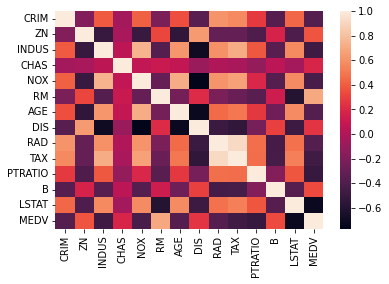

In [309]:
# Plotting the heatmap of correlation between features

sns.heatmap(corr)

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV

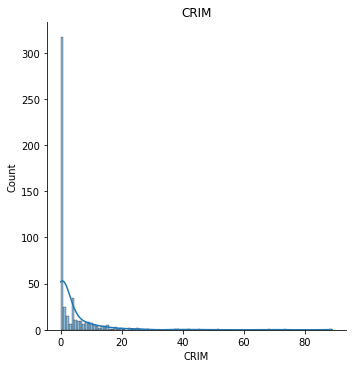

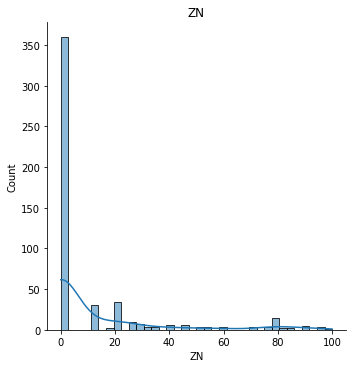

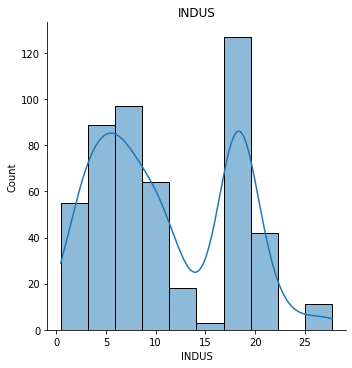

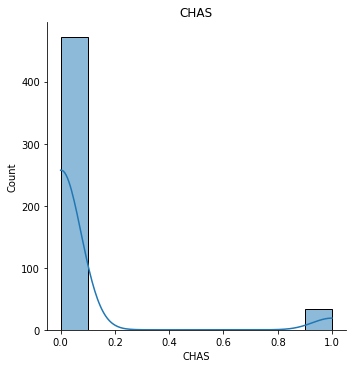

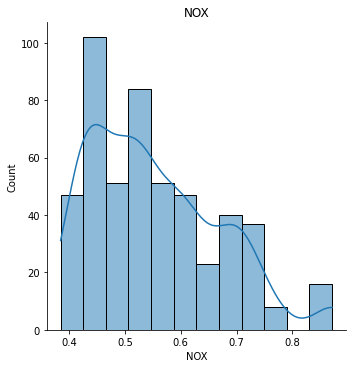

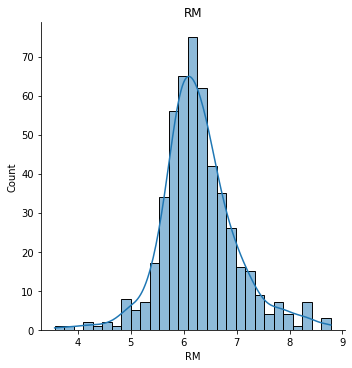

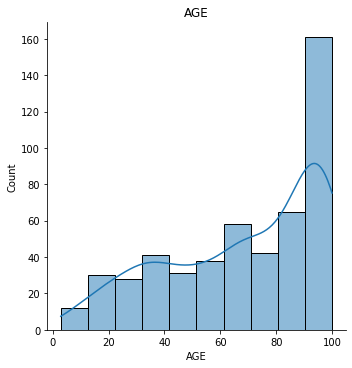

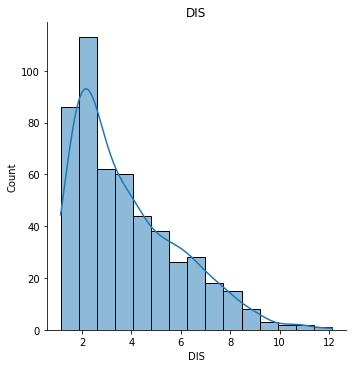

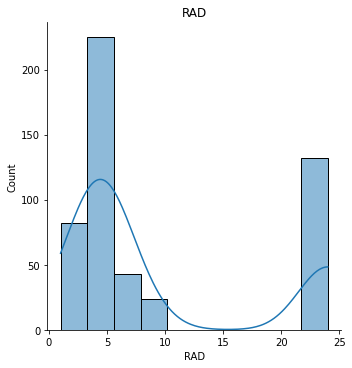

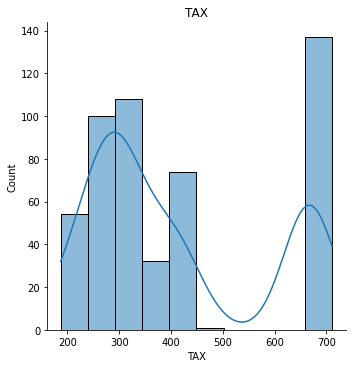

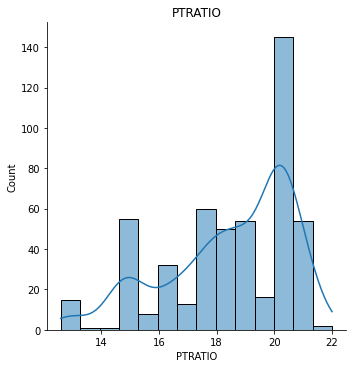

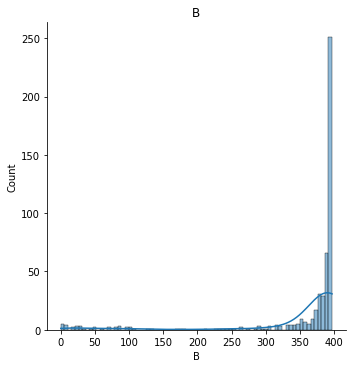

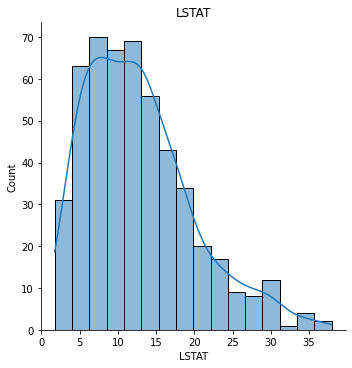

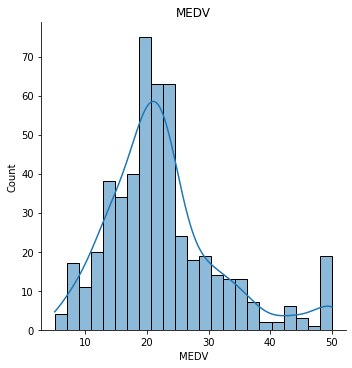

In [310]:


# Histograms of each feature
for feature in df.columns:
    sns.displot(df[feature], kde=True)
    plt.title(feature)
    plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


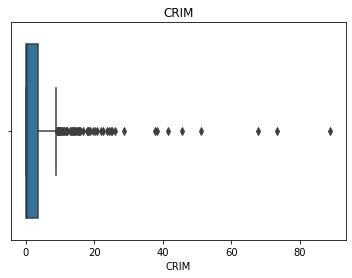

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


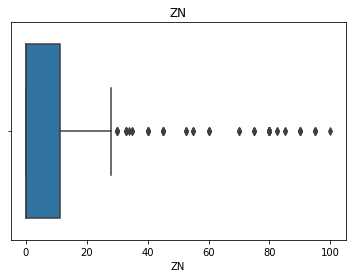

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


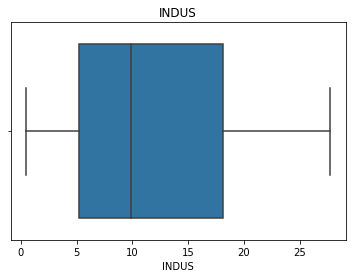

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


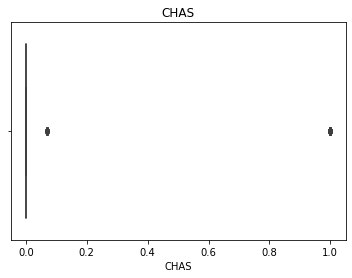

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


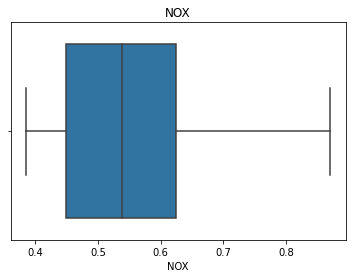

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


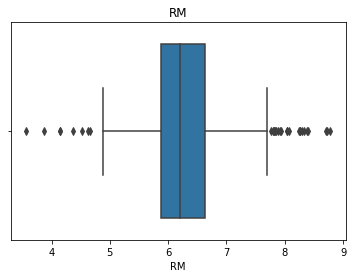

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


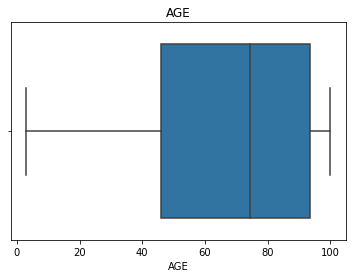

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


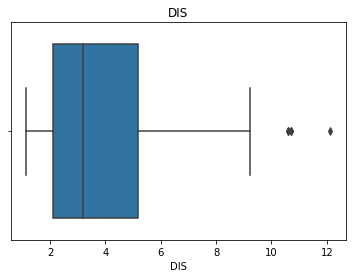

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


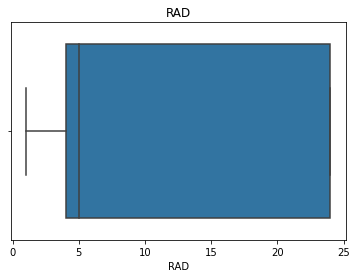

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


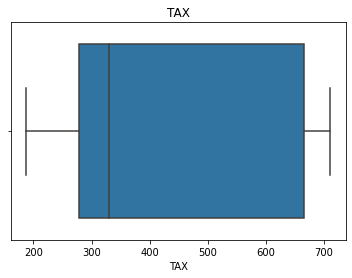

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


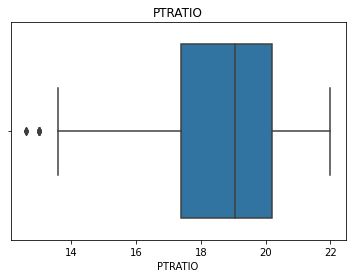

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


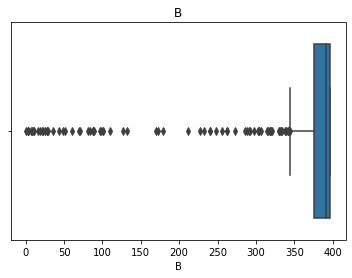

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


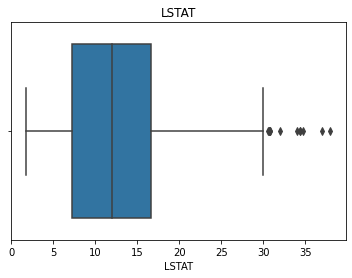

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


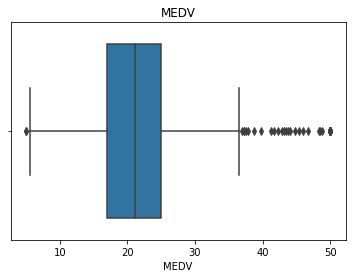

In [311]:
# Boxplots of each feature
for feature in df.columns:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()


In [312]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

         CRIM        ZN     INDUS      CHAS       NOX        RM           AGE  \
0    0.422328  0.296443  1.311010  0.279851  0.144217  0.413672  1.210593e-01   
1    0.419870  0.489639  0.599771  0.279851  0.740262  0.194274  3.787156e-01   
2    0.419872  0.489639  0.599771  0.279851  0.740262  1.282714  2.706270e-01   
3    0.419277  0.489639  1.330435  0.279851  0.835284  1.016303  8.287698e-01   
4    0.414981  0.489639  1.330435  0.279851  0.835284  1.228577  5.223385e-01   
..        ...       ...       ...       ...       ...       ...           ...   
501  0.415733  0.489639  0.126411  0.279851  0.158124  0.439316  2.121240e-02   
502  0.417766  0.489639  0.126411  0.279851  0.158124  0.234548  2.984598e-01   
503  0.415952  0.489639  0.126411  0.279851  0.158124  0.984960  8.201227e-01   
504  0.410232  0.489639  0.126411  0.279851  0.158124  0.725672  7.581068e-01   
505  0.417515  0.489639  0.126411  0.279851  0.158124  0.362767  5.184109e-16   

          DIS       RAD    

In [313]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57,  65,  66, 102, 141, 142, 154, 155, 160, 162, 163,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 208, 209, 210,
       211, 212, 216, 218, 219, 220, 221, 222, 225, 234, 236, 254, 255,
       256, 257, 262, 269, 273, 274, 276, 277, 282, 283, 283, 284, 286,
       290, 291, 292, 347, 348, 351, 352, 353, 353, 354, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        5,  3,  3,  1,  1,  1,  5,  5,  3,  3,  3,  3,  3,  3,  1,  3,  1,
        1,  1,  1,  1,  1,  1,  7,  7,  1,  7,  1,  7,  7,  3,  3,  3,  3,
        3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,  0,  

In [314]:
df = df[(z < 3).all(axis=1)]
df.shape

(403, 14)

In [315]:
#since some of these features shows quite good and very good correlation with our predictive variable Houese Price(MEDV)
df1 = df[['RM','TAX','PTRATIO','LSTAT','MEDV']]
df1.head()

,RM,TAX,PTRATIO,LSTAT,MEDV
0,6.575,296,15.3,4.980000,24.0
1,6.421,242,17.8,9.140000,21.6
2,7.185,242,17.8,4.030000,34.7
3,6.998,222,18.7,2.940000,33.4
4,7.147,222,18.7,12.715432,36.2


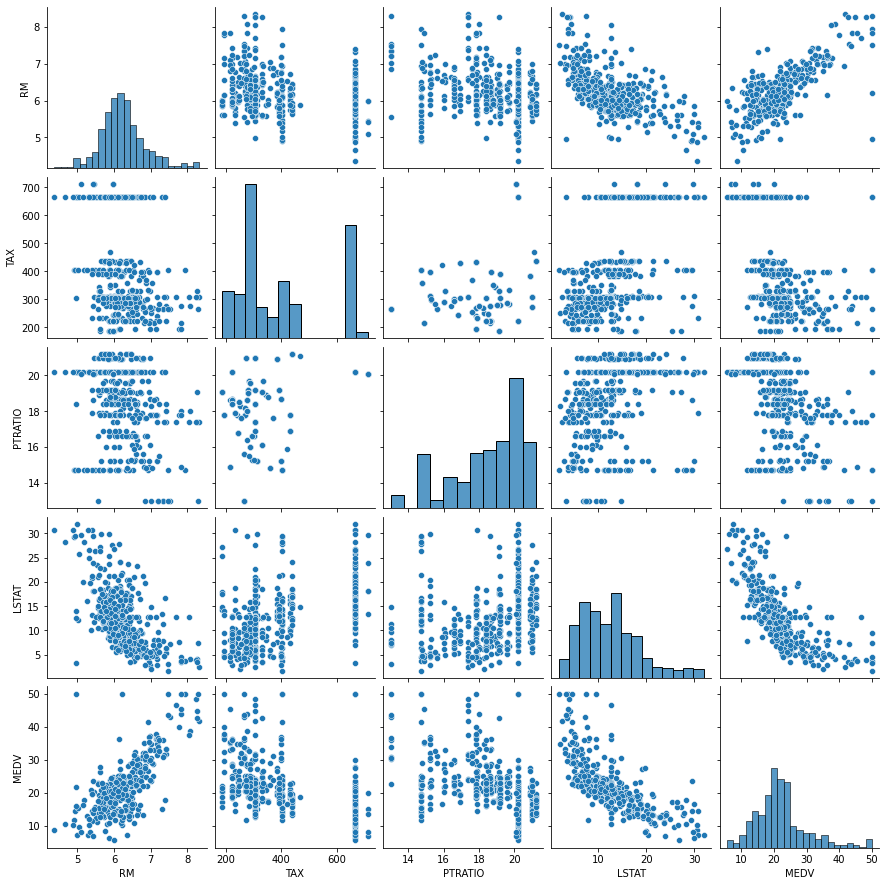

In [316]:
sns.pairplot(data=df1)

In [317]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

In [318]:
import numpy as np

from decision_tree_reg import DecisionTreeRegressor

class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
      
       
        self.trees = []

    def fit(self, X, y):
     
          for i in range(self.n_estimators):
            
                indices = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
                X_subset = X[indices]
                y_subset = y[indices]
                tree = DecisionTreeRegressor(max_depth=self.max_depth, 
                                              min_samples_split=self.min_samples_split
                                             
                                              )
                tree.fit(X_subset, y_subset)
                self.trees.append(tree)
    def predict(self, X):
        y_preds = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            y_preds[:, i] = tree.predict(X)
        return np.mean(y_preds, axis=1)            
    def mean_squared_error(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse = sum(squared_differences) / len(squared_differences)
      
      return mse
    
    
  


In [319]:

#column_s = ['LSTAT',  'NOX', 'PTRATIO', 'RM', 'DIS', 'AGE']
#X = df.loc[:,column_s]
#y = df.iloc[:, -1]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1,1)



In [320]:
import random

def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        random.seed(random_state)
    
    n = len(X)
    test_data = set(random.sample(range(n), int(n * test_size)))
    train_data = set(range(n)) - test_data
    X_train = [X[i] for i in train_data]
    X_train=np.array(X_train)
    X_test = [X[i] for i in test_data]
    X_test=np.array(X_test)
    y_train = [y[i] for i in train_data]
    y_train=np.array(y_train)
    y_test = [y[i] for i in test_data]
    y_test=np.array(y_test)
    return X_train, X_test, y_train, y_test
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

In [321]:
import numpy as np
regressor = RandomForestRegressor(n_estimators=10, max_depth=4, min_samples_split=2)
regressor.fit(X_train,y_train)


In [322]:
y_pred = regressor.predict(X_test)

In [323]:
y_pred

array([21.03040785, 21.03040785, 21.03040785, 21.03040785, 21.03040785,
       21.03040785, 21.03040785, 20.03450234, 21.03040785, 21.03040785,
       21.03040785, 21.03040785, 21.03040785, 21.03040785, 21.92456067,
       21.03040785, 21.03040785, 21.03040785, 21.03040785, 21.03040785,
       21.03040785, 21.03040785, 21.03040785, 21.03040785, 40.13701456,
       21.03040785, 21.03040785, 20.43450234, 21.03040785, 21.03040785,
       21.03040785, 19.4047717 , 20.03450234, 21.03040785, 21.03040785,
       21.03040785, 21.03040785, 21.03040785, 21.03040785, 21.03040785,
       21.03040785, 21.03040785, 35.51406558, 47.709     , 21.03040785,
       21.03040785, 21.03040785, 21.03040785, 26.31731279, 26.31731279,
       22.32289061, 21.03040785, 21.03040785, 21.03040785, 38.55968123,
       21.03040785, 21.03040785, 21.03040785, 21.03040785, 21.03040785,
       22.15674118, 18.93403539, 21.03040785, 21.03040785, 21.03040785,
       19.2029037 , 19.2029037 , 19.93880921, 20.03450234, 21.03

In [326]:
np.sqrt(regressor.mean_squared_error(y_test,y_pred))

array([6.33269925])

In [338]:
import numpy as np
from itertools import product
from sklearn.metrics import mean_squared_error

class GridSearchCV:
    def __init__(self, model, params):
        self.model = model
        self.params = params

    def fit(self, X, y):
        best_params = None
        best_score = np.inf
        
        for params in product(*self.params.values()):
            model = self.model(*params)
            model.fit(X, y)
            y_pred = model.predict(X)
            score = mean_squared_error(y, y_pred)
            
            if score < best_score:
                best_score = score
                best_params = params
                
        self.best_params_ = dict(zip(self.params.keys(), best_params))
        self.best_score_ = best_score
        self.best_model_ = self.model(*best_params)
        self.best_model_.fit(X, y)

        return self

    def predict(self, X):
        return self.best_model_.predict(X)


In [340]:
params = {"n_estimators": [10,20,40],
              "max_depth": [1, 2, 3, 4, 5,10,20],
              "min_samples_split": [2,4,6,8,10]
              }


gscv = GridSearchCV(RandomForestRegressor, params)
gscv.fit(X, y)

print("Best parameters:", gscv.best_params_)
print("Best score:", gscv.best_score_)


Best parameters: {'n_estimators': 10, 'max_depth': 20, 'min_samples_split': 10}
Best score: 8.998033586445471


In [329]:
# Define the random forest regression function
def random_forest_reg(X_train, y_train, X_test, n_estimators, max_depth,min_samples_split):
  # Fit the random forest regression model
  tree_reg = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split)
  tree_reg.fit(X_train, y_train)
  
  # Make predictions on the test data
  y_pred = tree_reg.predict(X_test)
  
  # Calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred)
  
  return mse

In [330]:
from sklearn.metrics import mean_squared_error

# Define the hyperparameter tuning function using randomized cross-validation
def random_search_cv(X_train, Y_train, X_test, param_dist, num_iter):
      # Define the best parameters and score
      best_params = {}
      best_score = np.inf

      # Perform the specified number of iterations
      for i in range(num_iter):
          # Select a random set of parameters
          params = {k: v[np.random.randint(len(v))] for k, v in param_dist.items()}

          # Evaluate the model with the selected parameters
          score = random_forest_reg(X_train, Y_train, X_test, **params)

          # Check if the model is the best so far
          if score < best_score:
              best_score = score
              best_params = params

      return best_params

# Define the hyperparameters and their possible values
param_dist = {"n_estimators": [10,20,40],
              "max_depth": [1, 2, 3, 4, 5,10,20],
              "min_samples_split": [2,4,6,8,10]
              }


In [336]:
# Perform the hyperparameter tuning with randomized cross-validation
best_params = random_search_cv(X_train, y_train, X_test, param_dist, 5)

# Print the best parameters
print("Best parameters:", best_params)

# Fit the random forest regression model with the best parameters
tree_reg = RandomForestRegressor(**best_params)
tree_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_reg.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error:", mse)

Best parameters: {'n_estimators': 10, 'max_depth': 10, 'min_samples_split': 4}
Mean squared error: 31.511592819732147


In [337]:
np.sqrt(regressor.mean_squared_error(y_test,y_pred))

array([5.61351876])